In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error as mse

In [ ]:
import os
for dirname, _, filenames in os.walk('/content/sample_data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/sample_data/anscombe.json
/content/sample_data/README.md
/content/sample_data/infy_stock.csv
/content/sample_data/california_housing_test.csv
/content/sample_data/mnist_test.csv
/content/sample_data/mnist_train_small.csv
/content/sample_data/california_housing_train.csv


In [ ]:
df = pd.read_csv('/content/sample_data/infy_stock.csv',
usecols = ['Date', 'Close'] , parse_dates=['Date'] , index_col='Date'
)
df.head()

,Close
Date,
2015-01-01,1974.40
2015-01-02,2013.20
2015-01-05,1995.90
2015-01-06,1954.20
2015-01-07,1963.55


In [ ]:
df.shape

(248, 1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 248 entries, 2015-01-01 to 2015-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   248 non-null    float64
dtypes: float64(1)
memory usage: 3.9 KB


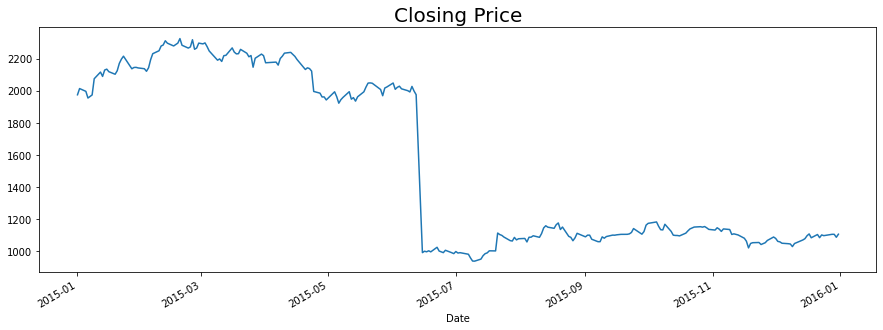

In [ ]:
plt.figure(figsize=(15,5))
df.Close.plot()
plt.title("Closing Price" , fontsize = 20)
plt.show()


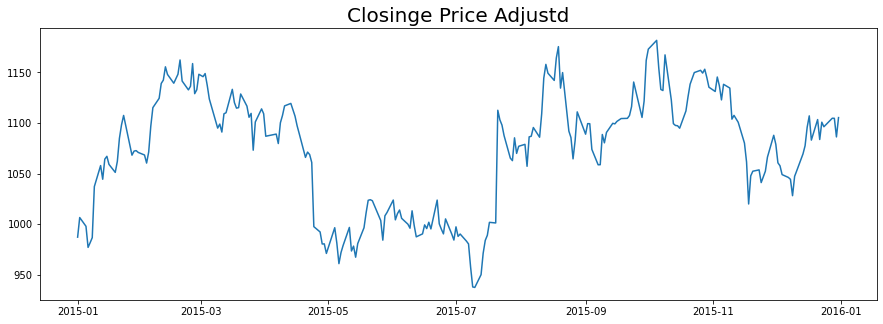

In [ ]:
#Taking Split into Account
plt.figure(figsize=(15,5))
stock_price = pd.concat([df.Close[:'2015-06-12']/2,df.Close['2015-06-15':]]) #adjustment
plt.plot(stock_price)
plt.title("Closinge Price Adjustd", fontsize = 20)
plt.show()

In [ ]:
prev_values = stock_price.iloc[: 180]
y_test = stock_price. iloc[180:]

 

def plot_pred(pred, title):
    plt.figure(figsize=(15,5))
    plt.plot(prev_values, label= 'Train')
    plt.plot(y_test, label='Actual')
    plt.plot(pred, label='Predicted' )
    plt.ylabel( "Stock prices")
    plt.title(title, fontsize=20)
    plt.legend()
    plt.show()

 


In [ ]:
yav = pd.Series(np.repeat(prev_values.mean(),68),index = y_test.index)
mse(yav,y_test)

3173.6356476000856

In [ ]:
np.sqrt(mse(yav,y_test))

56.33503037720035

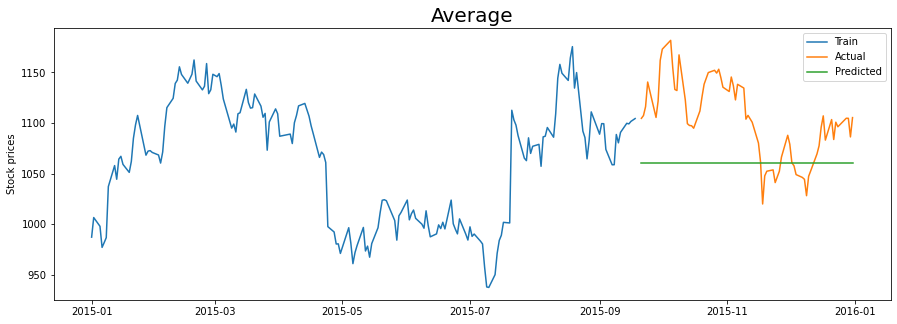

In [ ]:
plot_pred(yav,"Average")

In [ ]:
weight = np.array(range(0,))

In [ ]:
weight = np.array(range(0,180))/180
weighted_train_data = np.multiply(prev_values,weight)

weighted_average = sum(weighted_train_data)/sum(weight)
y_wa = pd.Series(np.repeat(weighted_average,68),index=y_test.index)


print("MSE: " , mse(y_wa, y_test))
print("RMSE:" , np.sqrt(mse(y_wa,y_test)))

MSE:  3496.475652551586
RMSE: 59.1310041564625


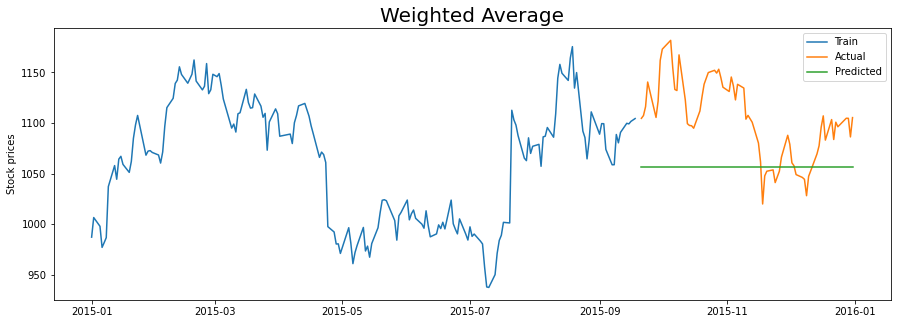

In [ ]:
plot_pred(y_wa,"Weighted Average")

 

 

For the other methods we will predict the value of stock price on a day based on the values of stock 
prices of 80 days prior to it. So in our series we will not consider the first eight days (since there previous eighty days is not in the series).

We have to test the last 68 values. This would be based on the last 80 days stock prices of each day in the test data.

Since we have neglected first 80 and last 68 is our test set, the train dataset will be between 80 and 180
(100 days).




In [ ]:
y_train = stock_price[80:180]
y_test = stock_price[180:]
print("y train:",y_train.shape, "\ny test:",y_test.shape)

y train: (100,) 
y test: (68,)


In [ ]:
X_train = pd.DataFrame([list(stock_price[i:i+80]) for i in  range(100)],columns = range(80,0,-1),index = y_train.index)

X_test = pd.DataFrame([list (stock_price[i:i+80])for i in range(100,168)],
                      columns = range(80,0,-1),index = y_test.index)

X_train

,80,79,78,77,76,75,74,73,72,71,...,10,9,8,7,6,5,4,3,2,1
Date,,,,,,,,,,,,,,,,,,,,,
2015-04-30,987.200,1006.600,997.950,977.100,981.775,986.725,1037.225,1057.975,1044.450,1064.325,...,1097.325,1089.625,1066.075,1071.300,1068.850,1061.000,997.600,992.325,980.450,980.575
2015-05-04,1006.600,997.950,977.100,981.775,986.725,1037.225,1057.975,1044.450,1064.325,1067.125,...,1089.625,1066.075,1071.300,1068.850,1061.000,997.600,992.325,980.450,980.575,971.125
2015-05-05,997.950,977.100,981.775,986.725,1037.225,1057.975,1044.450,1064.325,1067.125,1059.150,...,1066.075,1071.300,1068.850,1061.000,997.600,992.325,980.450,980.575,971.125,996.550
2015-05-06,977.100,981.775,986.725,1037.225,1057.975,1044.450,1064.325,1067.125,1059.150,1051.250,...,1071.300,1068.850,1061.000,997.600,992.325,980.450,980.575,971.125,996.550,981.375
2015-05-07,981.775,986.725,1037.225,1057.975,1044.450,1064.325,1067.125,1059.150,1051.250,1062.100,...,1068.850,1061.000,997.600,992.325,980.450,980.575,971.125,996.550,981.375,961.025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-09-11,1023.225,1008.400,1003.650,984.250,1008.300,1011.575,1023.900,1004.325,1010.450,1014.025,...,1111.050,1094.400,1089.000,1099.450,1099.350,1073.950,1058.750,1058.800,1088.700,1080.450
2015-09-14,1008.400,1003.650,984.250,1008.300,1011.575,1023.900,1004.325,1010.450,1014.025,1005.825,...,1094.400,1089.000,1099.450,1099.350,1073.950,1058.750,1058.800,1088.700,1080.450,1090.750
2015-09-15,1003.650,984.250,1008.300,1011.575,1023.900,1004.325,1010.450,1014.025,1005.825,1000.025,...,1089.000,1099.450,1099.350,1073.950,1058.750,1058.800,1088.700,1080.450,1090.750,1099.750


**Moving Average**

In [ ]:
y_ma = X_test.mean(axis=1)
mse(y_ma,y_test)
np.sqrt(mse(y_ma,y_test))

53.86486965821488

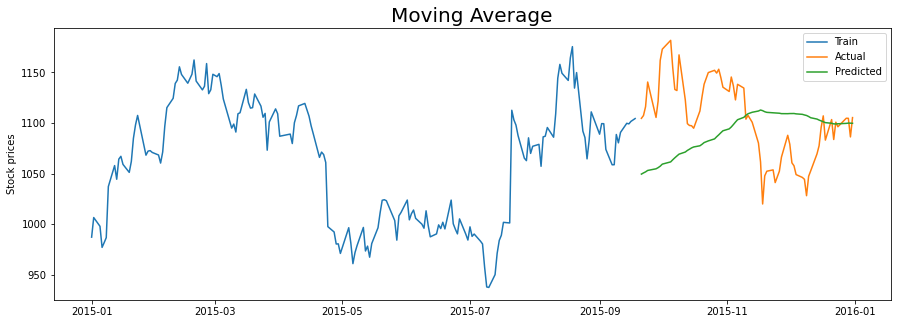

In [ ]:
plot_pred(y_ma,"Moving Average")

**Weighted Moving Average**

In [ ]:
weight = np.array(range(1,81))/80

y_wma = X_test@weight/sum(weight)
mse(y_wma,y_test),np.sqrt(mse(y_wma,y_test))

(1769.4332039308204, 42.064631270591455)

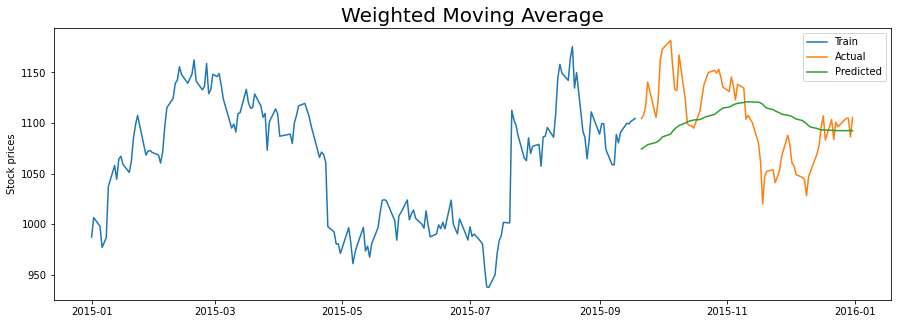

In [ ]:
plot_pred(y_wma,"Weighted Moving Average")

Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X_train,y_train)
y_lr = lr.predict(X_test)
y_lr = pd.Series(y_lr,index = y_test.index)

mse(y_test,y_lr), np.sqrt(mse(y_test,y_lr))

(1754.1645412925623, 41.88274753753104)

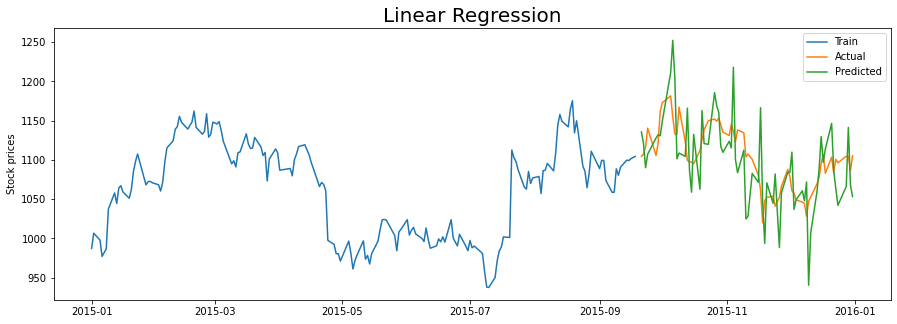

In [ ]:
plot_pred(y_lr,"Linear Regression")

**Lasso Regression**

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso()

las = lasso.fit(X_train , y_train)
y_las = las.predict(X_test)
y_las = pd.Series(y_las, index = y_test.index)

mse(y_las,y_test),np.sqrt(mse(y_las,y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.020e+02, tolerance: 3.391e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


(1467.333864613377, 38.305794138920774)

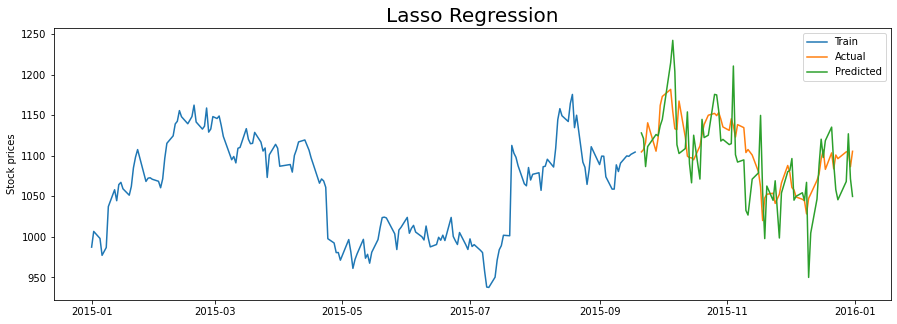

In [ ]:
plot_pred(y_las,"Lasso Regression")

**Moving window Neural Network**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

ma_nn = Sequential([Dense (64, input_shape = (80,),activation = 'relu'),
                    Dense(32,activation = 'linear'),Dense(1)])

ma_nn.compile(loss='mse',optimizer='rmsprop',metrics=['mae','mse'])

history = ma_nn.fit(X_train, y_train , epochs= 250, batch_size= 32, validation_split=0.25)


Epoch 1/250
3/3 [==============================] - 1s 115ms/step - loss: 996043.8125 - mae: 935.0964 - mse: 996043.8125 - val_loss: 6933.5439 - val_mae: 64.1154 - val_mse: 6933.5439
Epoch 2/250
3/3 [==============================] - 0s 14ms/step - loss: 19466.1602 - mae: 112.5185 - mse: 19466.1602 - val_loss: 53413.0039 - val_mae: 223.4102 - val_mse: 53413.0039
Epoch 3/250
3/3 [==============================] - 0s 15ms/step - loss: 11087.3203 - mae: 70.4133 - mse: 11087.3203 - val_loss: 77942.3828 - val_mae: 272.9574 - val_mse: 77942.3828
Epoch 4/250
3/3 [==============================] - 0s 18ms/step - loss: 18385.8047 - mae: 111.3837 - mse: 18385.8047 - val_loss: 6198.0625 - val_mae: 60.5059 - val_mse: 6198.0625
Epoch 5/250
3/3 [==============================] - 0s 15ms/step - loss: 41928.2773 - mae: 180.9746 - mse: 41928.2773 - val_loss: 269812.6250 - val_mae: 516.3667 - val_mse: 269812.6250
Epoch 6/250
3/3 [==============================] - 0s 15ms/step - loss: 114333.4922 - mae: 3

In [ ]:
plt.plot(history.history['mse'],label='Training loss')
plt.plot(history.history['val_mse'],label='Validation loss')
plt.title("Mean Squared error")
plt.xlabel("Number of Epochs")
plt.legend()
plt.show()

In [ ]:
loss_nn , mae_nn ,mse_nn =ma_nn.evaluate(X_test , y_test)
print("\nloss:", loss_nn,"\nnmae:",mae_nn,"\nmse:",mse_nn)

3/3 [==============================] - 0s 5ms/step - loss: 1507.2258 - mae: 33.9523 - mse: 1507.2258

loss: 1507.225830078125 
nmae: 33.95230484008789 
mse: 1507.225830078125


In [ ]:
y_nn = ma_nn.predict(X_test)
y_nn = pd.Series(y_nn[:,0],index = y_test.index)
mse(y_nn,y_test)

3/3 [==============================] - 0s 4ms/step


1507.2252479797344

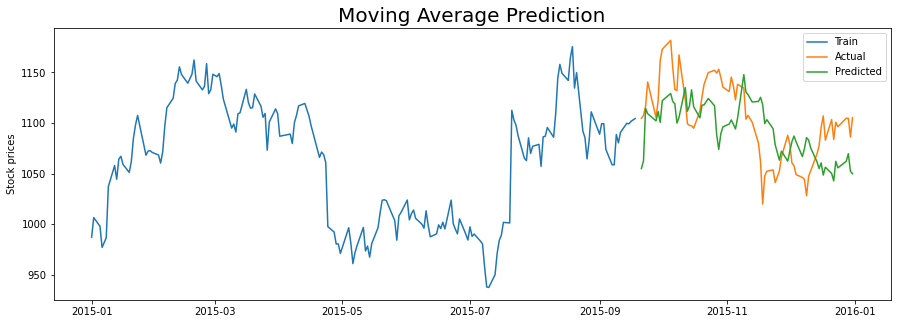

In [ ]:
plot_pred(y_nn,"Moving Average Prediction")

**Long Short Term Memory(LSTM)**